# Temat testów
### Czy istnieje istotna statystycznie różnica w poprawności odpowiedzi w zależności od odpowiedzi na pytania dotyczące preferowanego typu grafiki i formy graficznej, a także zmiany zdania w tych pytaniach przed i po badaniu?

### Czy istnieje istotna statystycznie różnica w ocenie trudności zadania w zależności od odpowiedzi na pytania dotyczące preferowanego typu grafiki i formy graficznej, a także zmiany zdania w tych pytaniach przed i po badaniu?

In [ ]:
import pandas as pd

from functions.set_preparations import prepare_set_changes_questions, prepare_row, prepare_row_from_cols
from functions.tests.independent_groups.two_groups import chi2_or_fisher_test, mann_whitney_test
from functions.tests.independent_groups.more_than_two_groups import kruskal_wallis_test, chi2_or_chi2_yate_test
from functions.plots import plot_heatmap, plot_multi_boxplot

In [ ]:
df_answers = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/data/correctness.csv',
    usecols=['ID', 'Quest1_before', 'Quest2_before', '1a_corr', '1b_corr', '2a_corr', '2b_corr', '3a_corr', '3b_corr', '1a_trud', '1b_trud', '2a_trud', '2b_trud', '3a_trud', '3b_trud']
)

df_answers = df_answers[df_answers.ID != 6] 

df_quest = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/data/survey.csv',
    usecols=['ID', 'Quest1_after', 'Quest2_after']
)

df_merge = df_answers.merge(df_quest, on='ID')
df_merge = df_merge[df_merge.ID != 6] 
df_merge.head()

In [ ]:
# Utworzenie kolekcji:
# wszystkie grafiki
q1_b = prepare_row_from_cols([df_merge['Quest1_before'] for _ in range(6)])
q2_b = prepare_row_from_cols([df_merge['Quest2_before'] for _ in range(6)])
q1_a = prepare_row_from_cols([df_merge['Quest1_after'] for _ in range(6)])
q2_a = prepare_row_from_cols([df_merge['Quest2_after'] for _ in range(6)])
popr_row = prepare_row(df_answers.filter(regex='.*_corr$'))
diff_row = prepare_row(df_answers.filter(regex='.*_trud$'))
df_collAll = pd.DataFrame({'correctness': popr_row, 'difficulty': diff_row, 'quest1_before': q1_b, 'quest2_before': q2_b, 'quest1_after': q1_a, 'quest2_after': q2_a})

# grafiki A
q1_b = prepare_row_from_cols([df_merge['Quest1_before'] for _ in range(3)])
q2_b = prepare_row_from_cols([df_merge['Quest2_before'] for _ in range(3)])
q1_a = prepare_row_from_cols([df_merge['Quest1_after'] for _ in range(3)])
q2_a = prepare_row_from_cols([df_merge['Quest2_after'] for _ in range(3)])
popr_row = prepare_row(df_answers.filter(regex='.*a_corr$'))
diff_row = prepare_row(df_answers.filter(regex='.*a_trud$'))
df_collA = pd.DataFrame({'correctness': popr_row, 'difficulty': diff_row, 'quest1_before': q1_b, 'quest2_before': q2_b, 'quest1_after': q1_a, 'quest2_after': q2_a})

# grafiki B
q1_b = prepare_row_from_cols([df_merge['Quest1_before'] for _ in range(3)])
q2_b = prepare_row_from_cols([df_merge['Quest2_before'] for _ in range(3)])
q1_a = prepare_row_from_cols([df_merge['Quest1_after'] for _ in range(3)])
q2_a = prepare_row_from_cols([df_merge['Quest2_after'] for _ in range(3)])
popr_row = prepare_row(df_answers.filter(regex='.*b_corr$'))
diff_row = prepare_row(df_answers.filter(regex='.*b_trud$'))
df_collB = pd.DataFrame({'correctness': popr_row, 'difficulty': diff_row, 'quest1_before': q1_b, 'quest2_before': q2_b, 'quest1_after': q1_a, 'quest2_after': q2_a})

# grafiki 1
q1_b = prepare_row_from_cols([df_merge['Quest1_before'] for _ in range(2)])
q2_b = prepare_row_from_cols([df_merge['Quest2_before'] for _ in range(2)])
q1_a = prepare_row_from_cols([df_merge['Quest1_after'] for _ in range(2)])
q2_a = prepare_row_from_cols([df_merge['Quest2_after'] for _ in range(2)])
popr_row = prepare_row(df_answers.filter(regex='1.*_corr$'))
diff_row = prepare_row(df_answers.filter(regex='1.*_trud$'))
df_coll1 = pd.DataFrame({'correctness': popr_row, 'difficulty': diff_row, 'quest1_before': q1_b, 'quest2_before': q2_b, 'quest1_after': q1_a, 'quest2_after': q2_a})

# grafiki 2
q1_b = prepare_row_from_cols([df_merge['Quest1_before'] for _ in range(2)])
q2_b = prepare_row_from_cols([df_merge['Quest2_before'] for _ in range(2)])
q1_a = prepare_row_from_cols([df_merge['Quest1_after'] for _ in range(2)])
q2_a = prepare_row_from_cols([df_merge['Quest2_after'] for _ in range(2)])
popr_row = prepare_row(df_answers.filter(regex='2.*_corr$'))
diff_row = prepare_row(df_answers.filter(regex='2.*_trud$'))
df_coll2 = pd.DataFrame({'correctness': popr_row, 'difficulty': diff_row, 'quest1_before': q1_b, 'quest2_before': q2_b, 'quest1_after': q1_a, 'quest2_after': q2_a})

# grafiki 3
q1_b = prepare_row_from_cols([df_merge['Quest1_before'] for _ in range(2)])
q2_b = prepare_row_from_cols([df_merge['Quest2_before'] for _ in range(2)])
q1_a = prepare_row_from_cols([df_merge['Quest1_after'] for _ in range(2)])
q2_a = prepare_row_from_cols([df_merge['Quest2_after'] for _ in range(2)])
popr_row = prepare_row(df_answers.filter(regex='3.*_corr$'))
diff_row = prepare_row(df_answers.filter(regex='3.*_trud$'))
df_coll3 = pd.DataFrame({'correctness': popr_row, 'difficulty': diff_row, 'quest1_before': q1_b, 'quest2_before': q2_b, 'quest1_after': q1_a, 'quest2_after': q2_a})

### TESTY

Testy oddzielnie dla każdej grafiki 1a, 1b, 2a, 2b, 3a, 3b

In [85]:
df1a = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '1a_corr', '1a_trud']].rename(columns={'1a_corr':'correctness', '1a_trud': 'difficulty'})
df2a = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '2a_corr', '2a_trud']].rename(columns={'2a_corr':'correctness', '2a_trud': 'difficulty'})
df3a = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '3a_corr', '3a_trud']].rename(columns={'3a_corr':'correctness', '3a_trud': 'difficulty'})

df1b = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '1b_corr', '1b_trud']].rename(columns={'1b_corr':'correctness', '1b_trud': 'difficulty'})
df2b = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '2b_corr', '2b_trud']].rename(columns={'2b_corr':'correctness', '2b_trud': 'difficulty'})
df3b = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '3b_corr', '3b_trud']].rename(columns={'3b_corr':'correctness', '3b_trud': 'difficulty'})

dfs = [df1a, df1b, df2a, df2b, df3a, df3b]
names = {
    1: '1a:',
    2: '1b:',
    3: '2a:',
    4: '2b:',
    5: '3a:',
    6: '3b:',
}

POPRAWNOŚĆ ODPOWIEDZI

**H0:** Nie ma istotnej statystycznie zależności między poprawnością odpowiedzi a wybraną preferowaną formą (mapa vs mapa + inne elementy; mapa vs tabela vs wykres vs tekst).

**H1:** Istnieje istotna statystycznie zależność między poprawnością odpowiedzi a wybraną preferowaną formą (mapa vs mapa + inne elementy; mapa vs tabela vs wykres vs tekst).

**Poziom istotności:** $\alpha=0.05$

In [ ]:
ALPHA = 0.05

In [82]:
for nr, df in enumerate(dfs):
    print('---------------------------------------------')
    print(names[nr+1])
    for i in ['Quest1_before', 'Quest1_after']:
        print('----------------')
        print(i)
        chi2_or_fisher_test(df, 'correctness', i, ALPHA)

---------------------------------------------
1a:
----------------
Quest1_before
Quest1_before  A   B
correctness         
0              1   4
1              3  32
Fisher test conducted...
Fisher test statistic value: 2.6666666666666665
P-value: 0.42707079549184823
Brak podstaw do odrzucenia H0.
----------------
Quest1_after
Quest1_after  A   B
correctness        
0             4   1
1             7  28
Fisher test conducted...
Fisher test statistic value: 16.0
P-value: 0.015246015246015246
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
---------------------------------------------
1b:
----------------
Quest1_before
Quest1_before  A   B
correctness         
0              0   3
1              4  33
Fisher test conducted...
Fisher test statistic value: 0.0
P-value: 1.0
Brak podstaw do odrzucenia H0.
----------------
Quest1_after
Quest1_after  A   B
correctness        
0             2   1
1             9  28
Fisher test conducted...
Fisher test statistic value: 6.222222222

In [83]:
col = 'correctness'
for nr, df in enumerate(dfs):
    print('---------------------------------------------')
    print(names[nr+1])
    for i in ['Quest2_before', 'Quest2_after']:
        print('----------------')
        print(i)
        chi2_or_chi2_yate_test(df, col, i, alpha=ALPHA)

---------------------------------------------
1a:
----------------
Quest2_before
Quest2_before  mapa  tabela  tekst  wykres
correctness                               
0                 3       1      0       1
1                18       6      3       8
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 0.526077097505669
P-value: 0.9131261529010268
Brak podstaw do odrzucenia H0.
----------------
Quest2_after
Quest2_after  mapa  tabela  tekst  wykres
correctness                              
0                5       0      0       0
1               13       6      1      15
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 6.984126984126984
P-value: 0.07240542401850052
Brak podstaw do odrzucenia H0.
---------------------------------------------
1b:
----------------
Quest2_before
Quest2_before  mapa  tabela  tekst  wykres
correctness                               
0                 1       1      0       1
1                20     

-------------------------------------
1a:


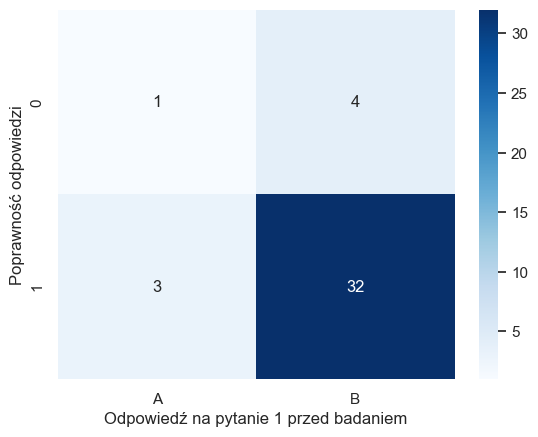

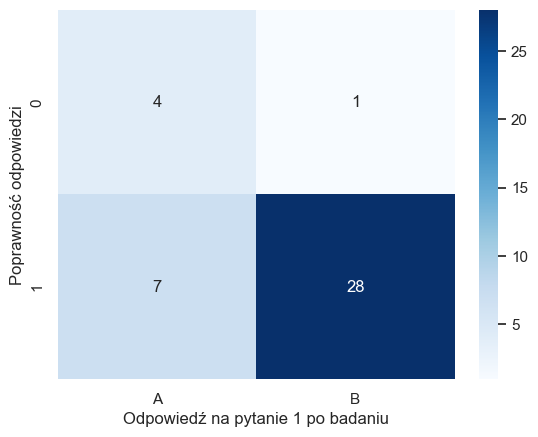

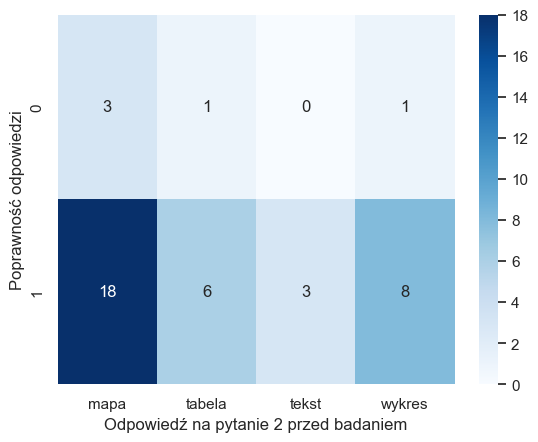

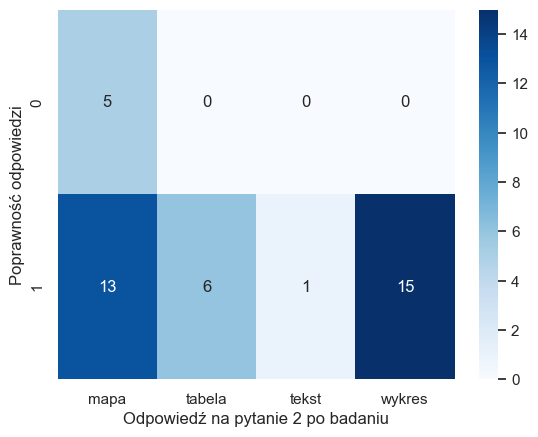

-------------------------------------
1b:


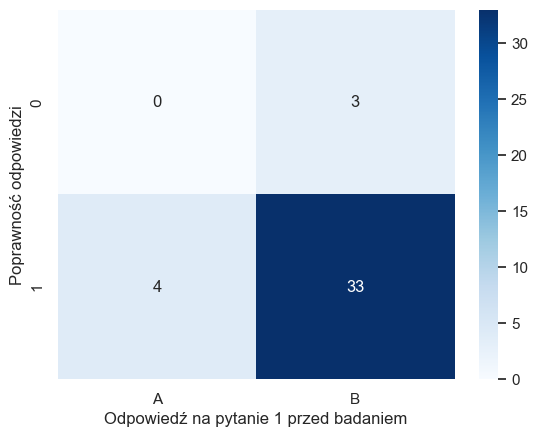

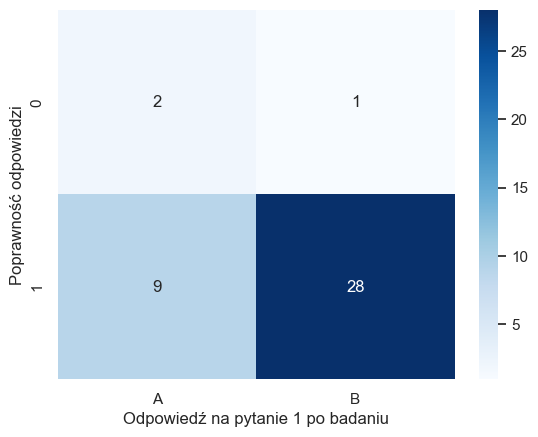

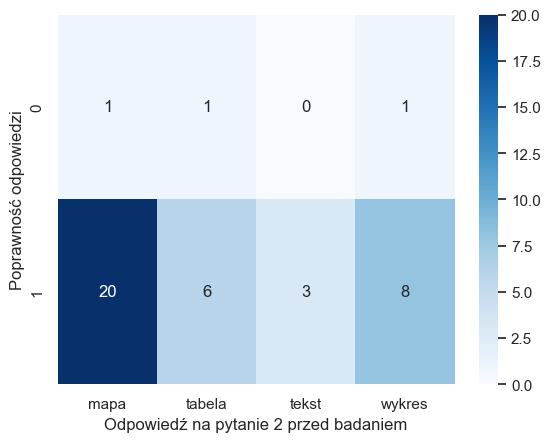

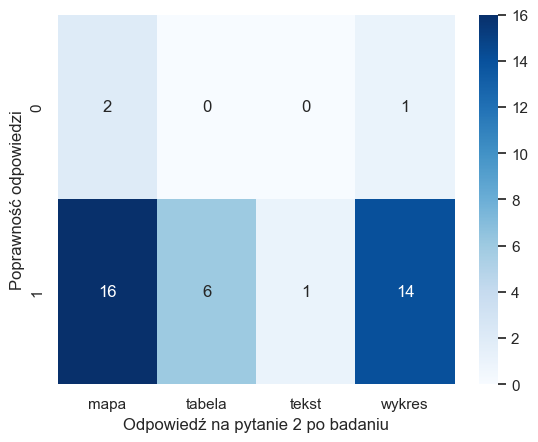

-------------------------------------
2a:


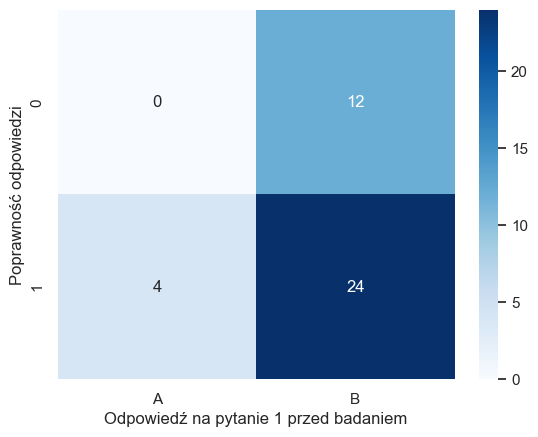

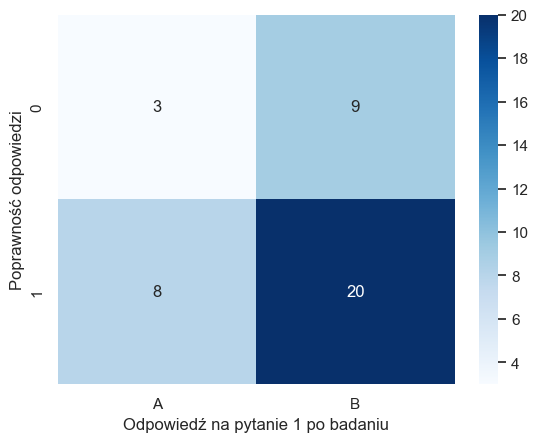

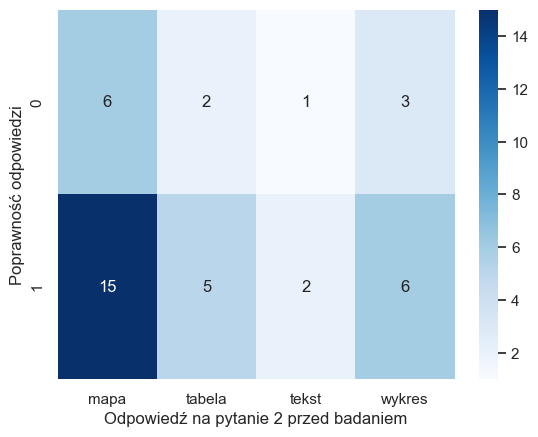

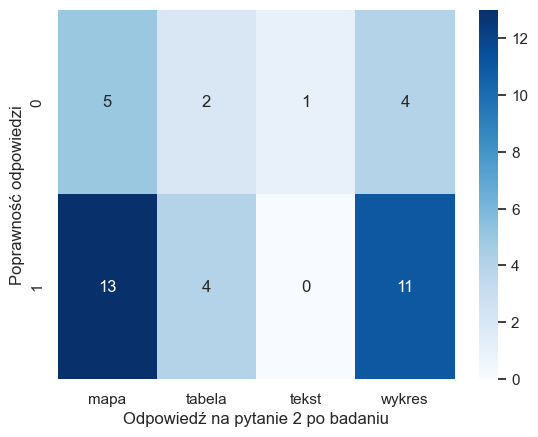

-------------------------------------
2b:


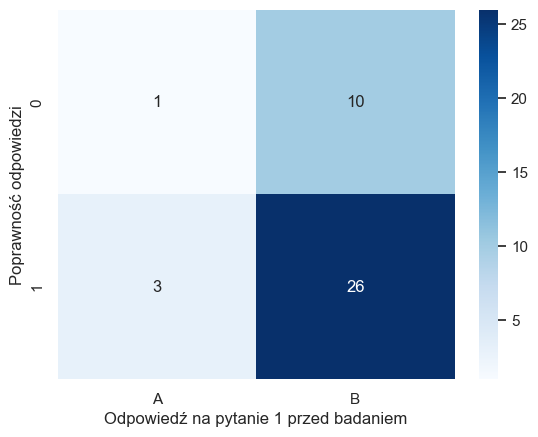

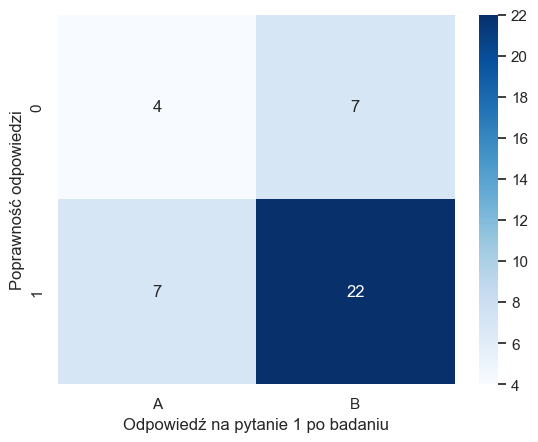

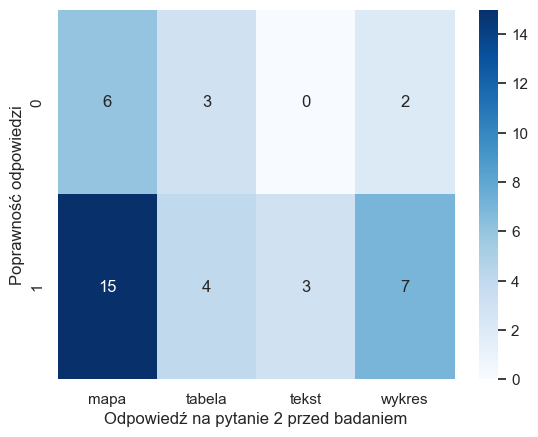

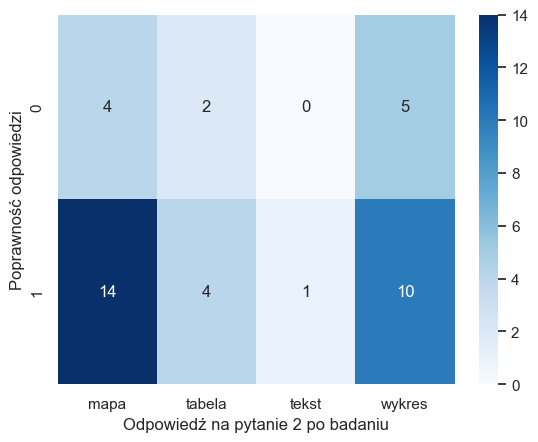

-------------------------------------
3a:


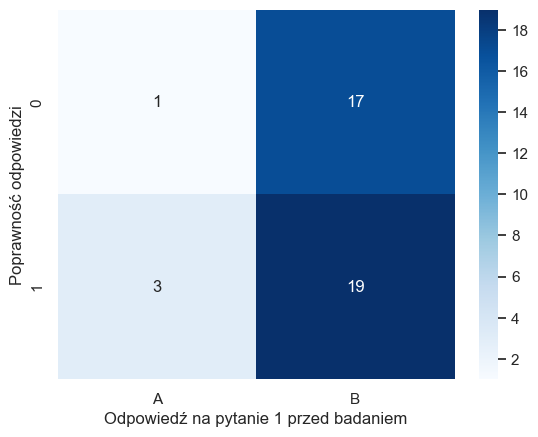

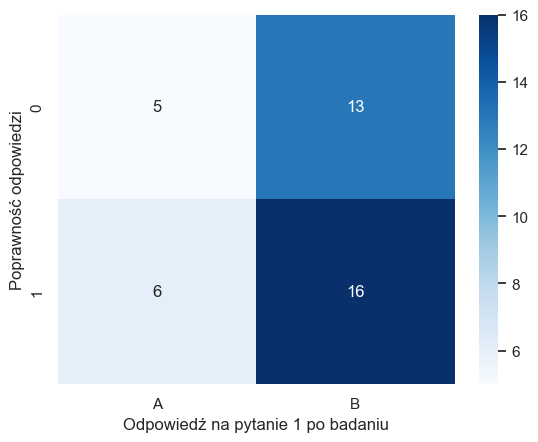

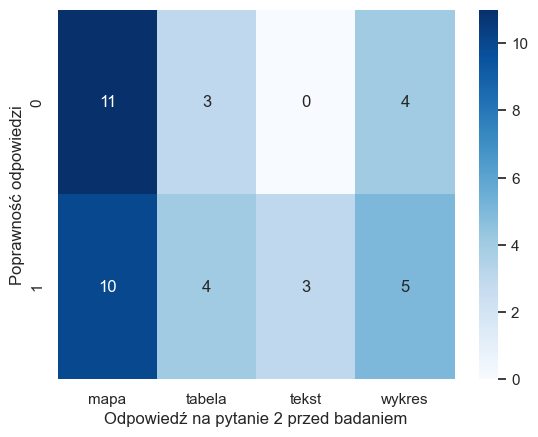

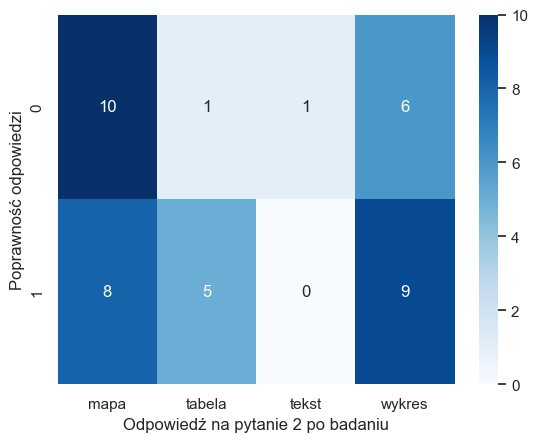

-------------------------------------
3b:


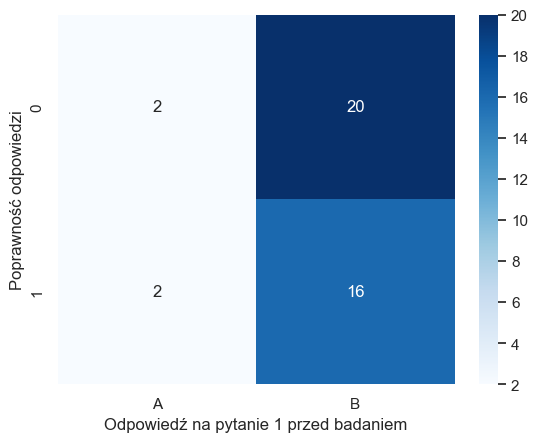

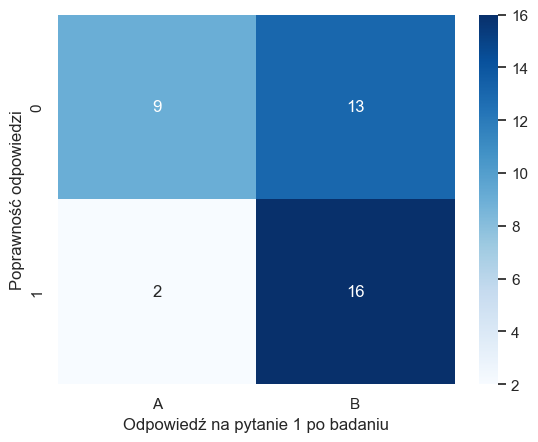

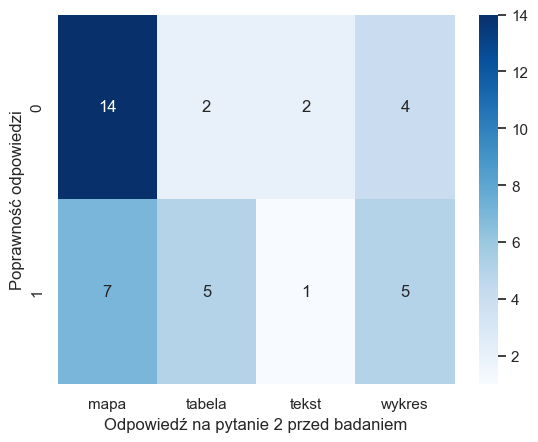

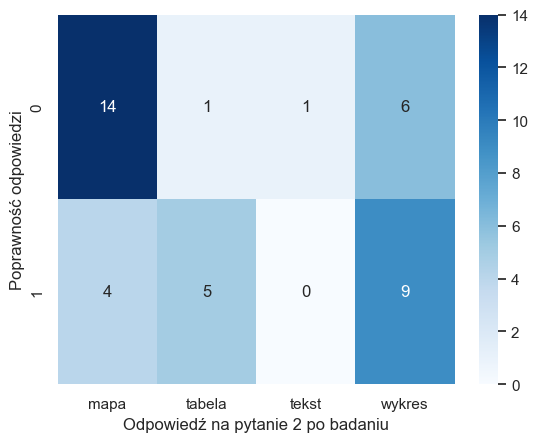

In [84]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])

    plot_heatmap(df, 'correctness', 'Quest1_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 przed badaniem', cmap='Blues')
    plot_heatmap(df, 'correctness', 'Quest1_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 po badaniu', cmap='Blues')
    plot_heatmap(df, 'correctness', 'Quest2_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 przed badaniem', cmap='Blues')
    plot_heatmap(df, 'correctness', 'Quest2_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 po badaniu', cmap='Blues')

### Podsumowanie:
Istnieje istotna statystycznie zależność między poprawnością odpowiedzi a odpowiedzią na pytanie dotyczące preferowanej formy graficznej na poziomie istotności $\alpha=0.05$ dla:
- grafika 1a, quest1_after
- grafika 3b, quest2_after

TRUDNOŚĆ ZADANIA

**H0:** Nie ma istotnej statystycznie zależności między oceną trudności zadania a wybraną preferowaną formą (mapa vs mapa + inne elementy; mapa vs tabela vs wykres vs tekst).

**H1:** Istnieje istotna statystycznie zależność między oceną trudności zadania a wybraną preferowaną formą (mapa vs mapa + inne elementy; mapa vs tabela vs wykres vs tekst).

**Poziom istotności:** $\alpha=0.05$

In [86]:
for nr, df in enumerate(dfs):
    print('---------------------------------------------')
    print(names[nr+1])
    for i in ['Quest1_before', 'Quest1_after']:
        print('----------------')
        print(i)
        mann_whitney_test([df['difficulty'][df[i] == 'A'], df['difficulty'][df[i] == 'B']], print_flag=True, alpha=ALPHA)

---------------------------------------------
1a:
----------------
Quest1_before
U-statistic: 73.5
p-value: 0.9622734753395483
Brak podstaw do odrzucenia H0.
----------------
Quest1_after
U-statistic: 176.0
p-value: 0.6111162097289846
Brak podstaw do odrzucenia H0.
---------------------------------------------
1b:
----------------
Quest1_before
U-statistic: 99.0
p-value: 0.19598768101658237
Brak podstaw do odrzucenia H0.
----------------
Quest1_after
U-statistic: 227.0
p-value: 0.02805441981574861
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
---------------------------------------------
2a:
----------------
Quest1_before
U-statistic: 67.0
p-value: 0.8322242496571796
Brak podstaw do odrzucenia H0.
----------------
Quest1_after
U-statistic: 179.5
p-value: 0.537374516799005
Brak podstaw do odrzucenia H0.
---------------------------------------------
2b:
----------------
Quest1_before
U-statistic: 43.0
p-value: 0.17884156309752575
Brak podstaw do odrzucenia H0.
------------

In [87]:
col = 'difficulty'
for nr, df in enumerate(dfs):
    print('---------------------------------------------')
    print(names[nr+1])
    for i in ['Quest2_before', 'Quest2_after']:
        print('----------------')
        print(i)
        map = df[col][df[i] == 'mapa']
        tab = df[col][df[i] == 'tabela']
        text = df[col][df[i] == 'tekst']
        plot = df[col][df[i] == 'wykres']
        kruskal_wallis_test([map, tab, text, plot], print_flag=True, alpha=ALPHA)

---------------------------------------------
1a:
----------------
Quest2_before
H: 12.541659290729926
p-value: 0.005740310433430476
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------------
Quest2_after
H: 2.4634534627564486
p-value: 0.48193208148204614
Brak podstaw do odrzucenia H0.
---------------------------------------------
1b:
----------------
Quest2_before
H: 0.9518367346938728
p-value: 0.812903748809716
Brak podstaw do odrzucenia H0.
----------------
Quest2_after
H: 8.787047619047652
p-value: 0.032260375757736735
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
---------------------------------------------
2a:
----------------
Quest2_before
H: 0.33922239108410346
p-value: 0.9524906277505929
Brak podstaw do odrzucenia H0.
----------------
Quest2_after
H: 2.3709219858156003
p-value: 0.49907043739483936
Brak podstaw do odrzucenia H0.
---------------------------------------------
2b:
----------------
Quest2_before
H: 0.8505706657277686
p-value: 0.83

-------------------------------------
1a:


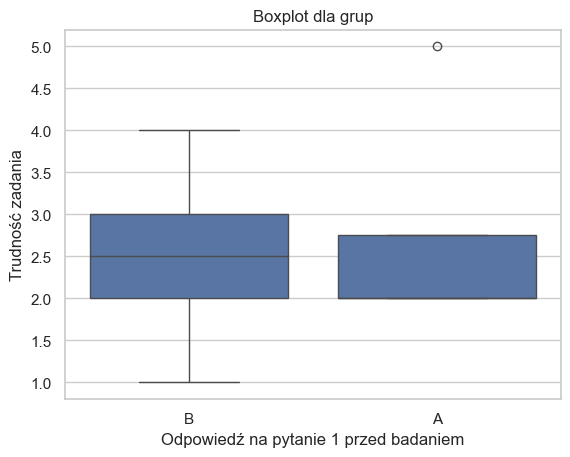

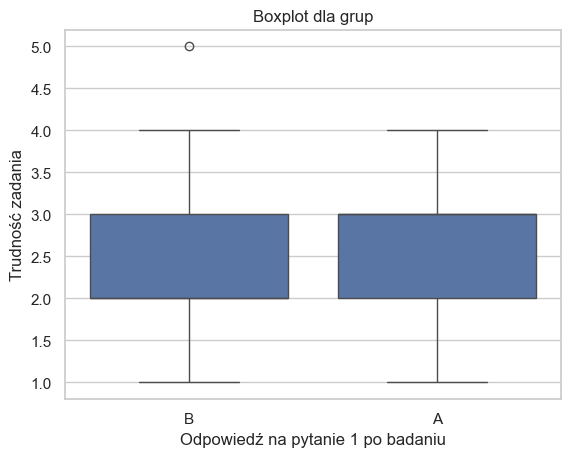

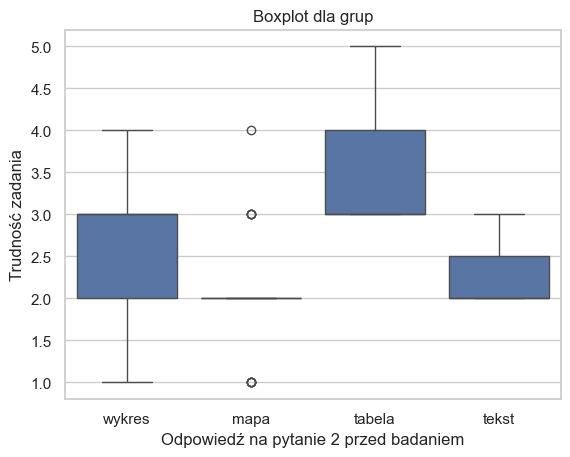

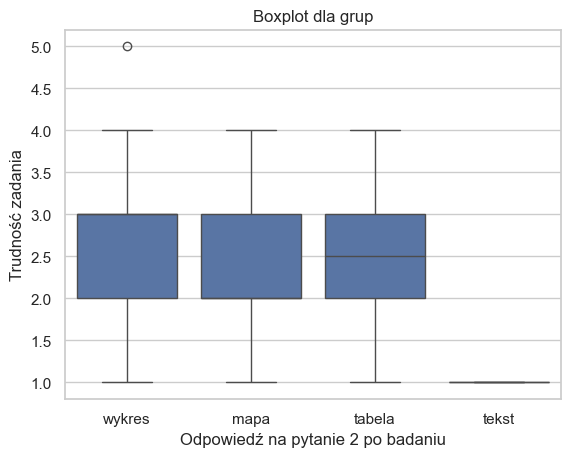

-------------------------------------
1b:


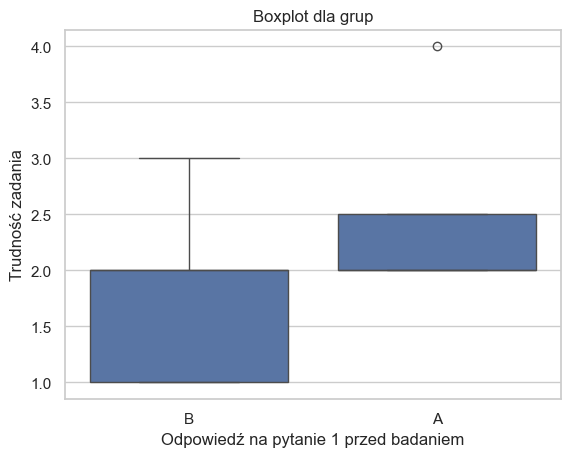

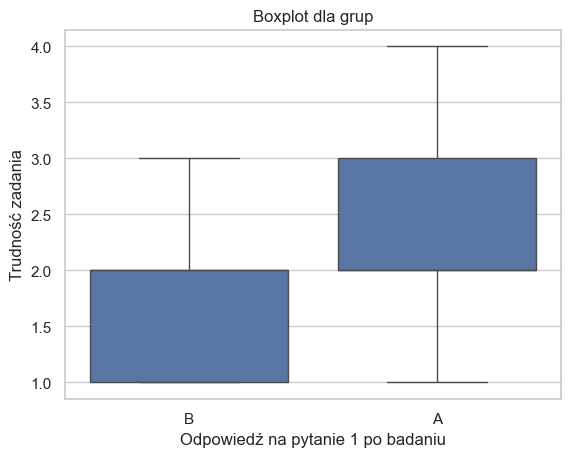

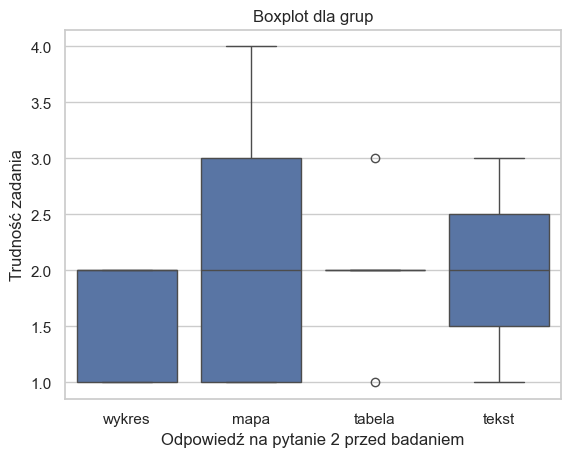

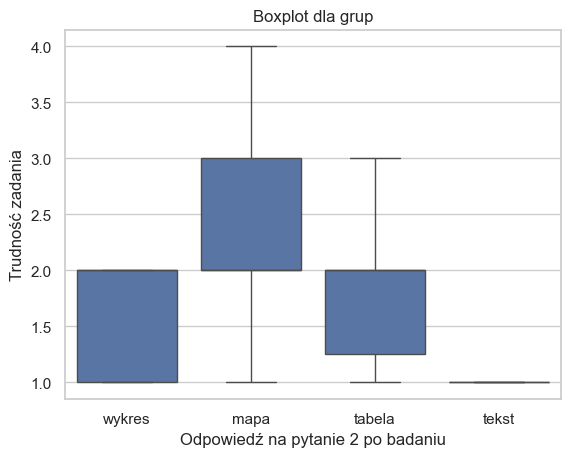

-------------------------------------
2a:


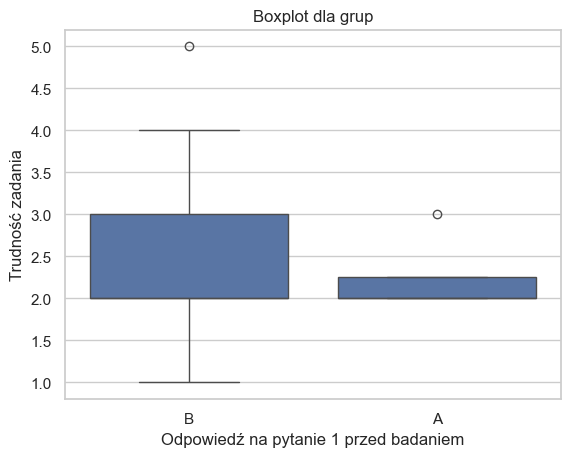

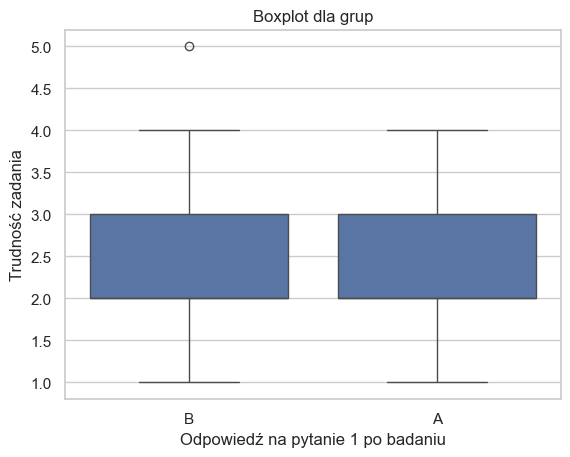

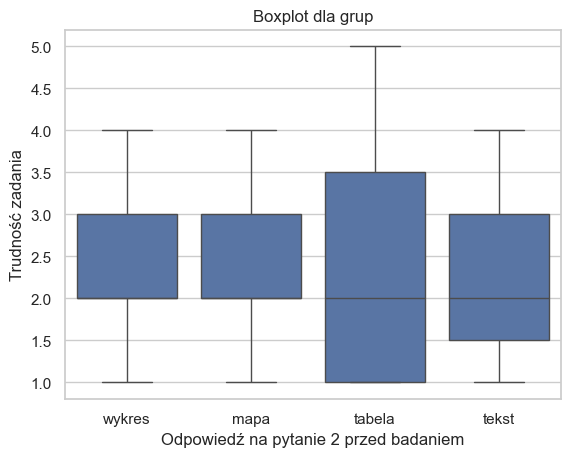

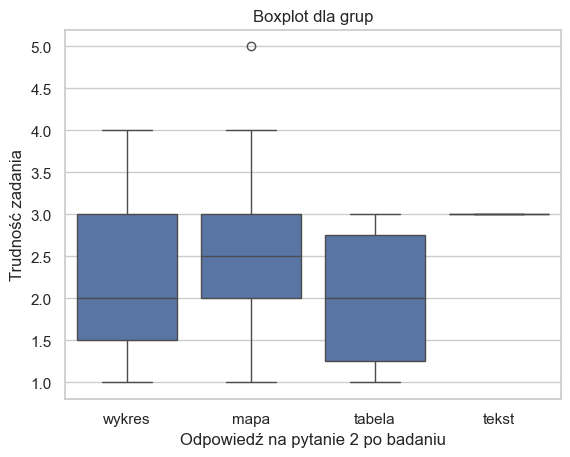

-------------------------------------
2b:


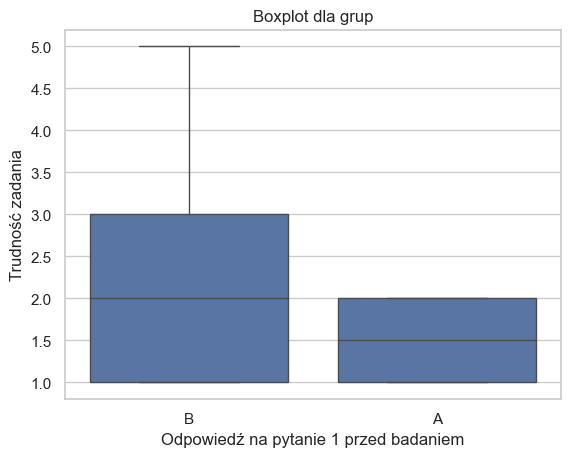

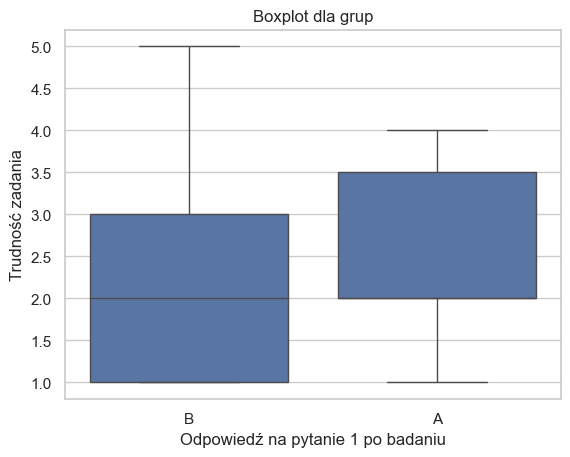

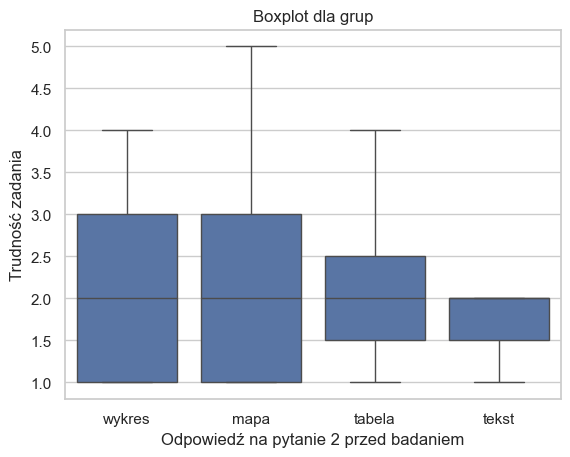

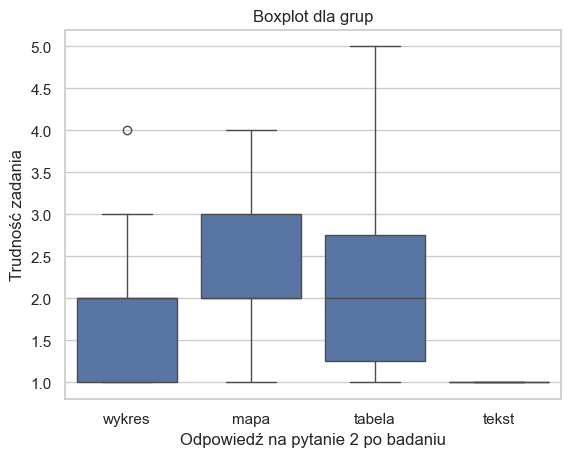

-------------------------------------
3a:


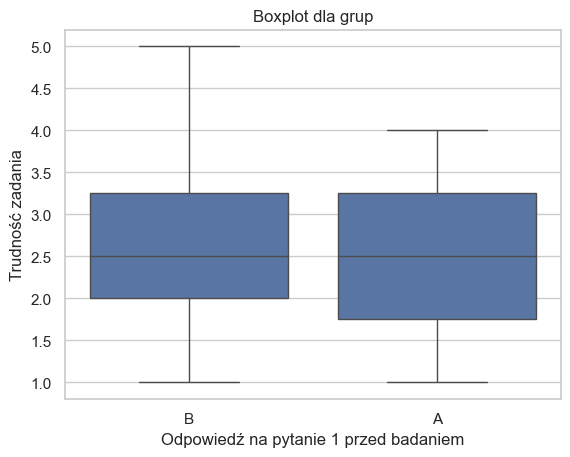

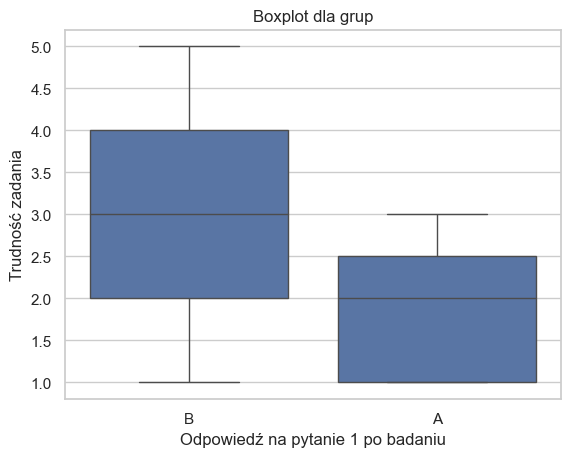

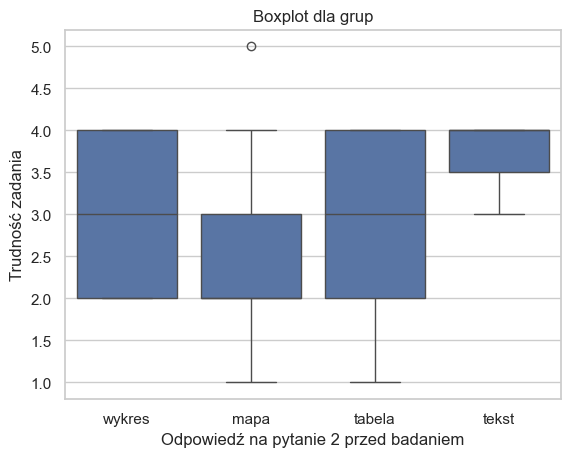

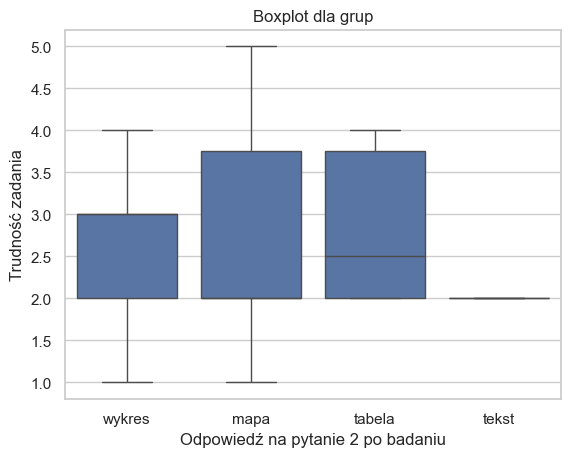

-------------------------------------
3b:


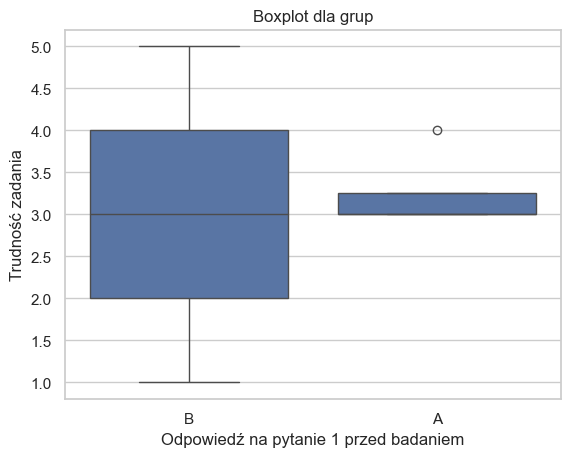

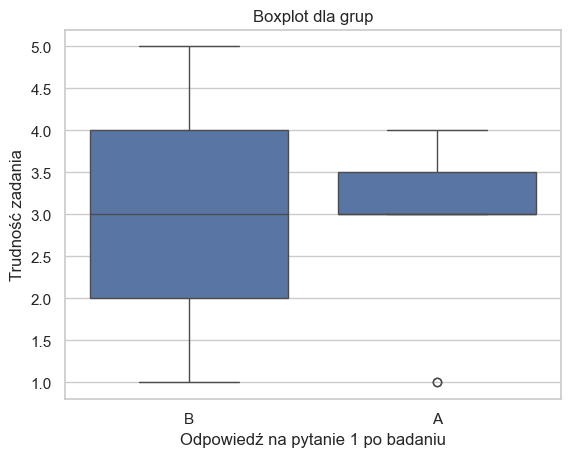

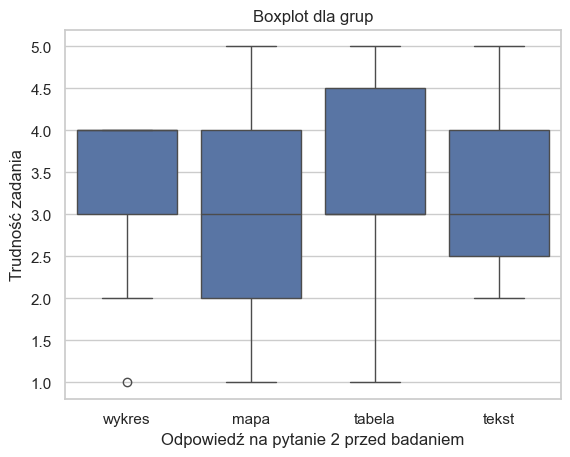

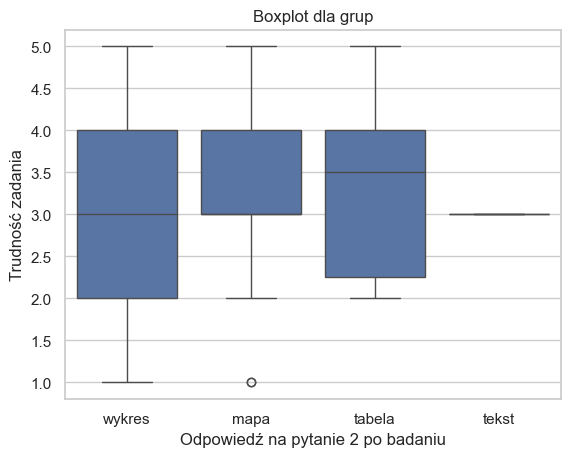

In [91]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])

    plot_multi_boxplot(df, 'Quest1_before', 'difficulty', 'Odpowiedź na pytanie 1 przed badaniem', 'Trudność zadania')
    plot_multi_boxplot(df, 'Quest1_after', 'difficulty', 'Odpowiedź na pytanie 1 po badaniu', 'Trudność zadania')
    plot_multi_boxplot(df, 'Quest2_before', 'difficulty', 'Odpowiedź na pytanie 2 przed badaniem', 'Trudność zadania')
    plot_multi_boxplot(df, 'Quest2_after', 'difficulty', 'Odpowiedź na pytanie 2 po badaniu', 'Trudność zadania')

Podsumowanie:
Istotne statystycznie:
- 1b (quest1_after, quest2_after)
- 3a (quest1_after, quest2_before)
- 1a (quest2_before)

### Analiza - osoby które zmieniły zdanie vs osoby które pozostały przy swojej opinii

**H0:** Nie ma istotnej statystycznie zależności między poprawnością odpowiedzi a zmianą zdania w pytaniu 1/2.

**H1:** Istnieje istotna statystycznie zależność między poprawnością odpowiedzi a zmianą zdania w pytaniu 1/2.

**Poziom istotności:** $\alpha=0.05$


In [92]:
df_merge['is_change_1'] = df_merge.apply(lambda row: row['Quest1_before'] != row['Quest1_after'], axis=1)
df_merge['is_change_2'] = df_merge.apply(lambda row: row['Quest2_before'] != row['Quest2_after'], axis=1)

df_merge.to_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/quest12.csv')

#### Grafiki:

1a:
----------------
quest1
quest1       False  True
correctness             
0                2     3
1               29     6
Fisher test conducted...
Fisher test statistic value: 0.13793103448275862
P-value: 0.06548856548856549
Brak podstaw do odrzucenia H0.


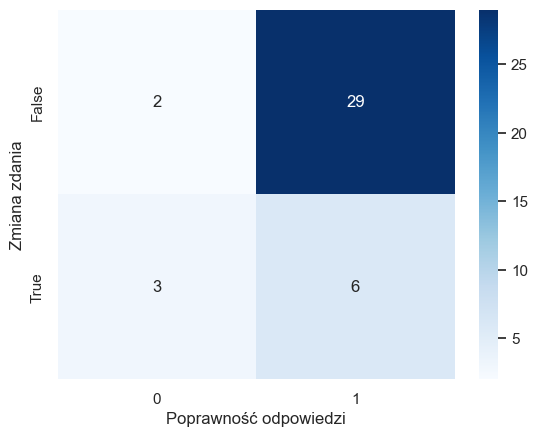

----------------
quest2
quest2       False  True
correctness             
0                3     2
1               13    22
Fisher test conducted...
Fisher test statistic value: 2.5384615384615383
P-value: 0.37250610934821454
Brak podstaw do odrzucenia H0.


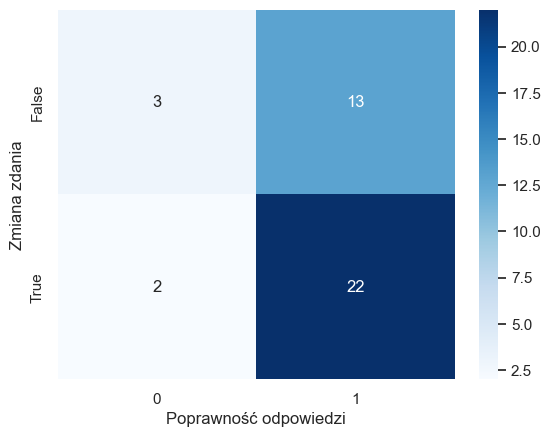

--------------------------------------------
1b:
----------------
quest1
quest1       False  True
correctness             
0                1     2
1               30     7
Fisher test conducted...
Fisher test statistic value: 0.11666666666666667
P-value: 0.12145748987854249
Brak podstaw do odrzucenia H0.


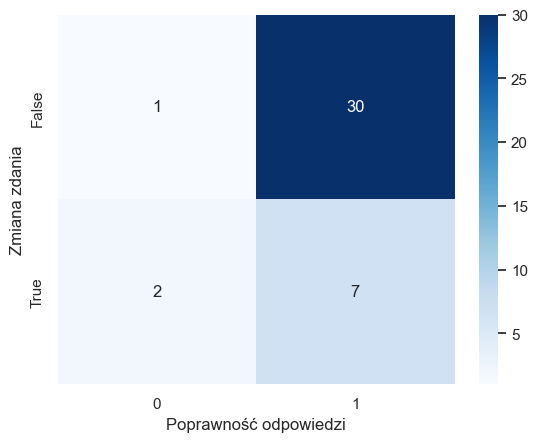

----------------
quest2
quest2       False  True
correctness             
0                0     3
1               16    21
Fisher test conducted...
Fisher test statistic value: 0.0
P-value: 0.26153846153846155
Brak podstaw do odrzucenia H0.


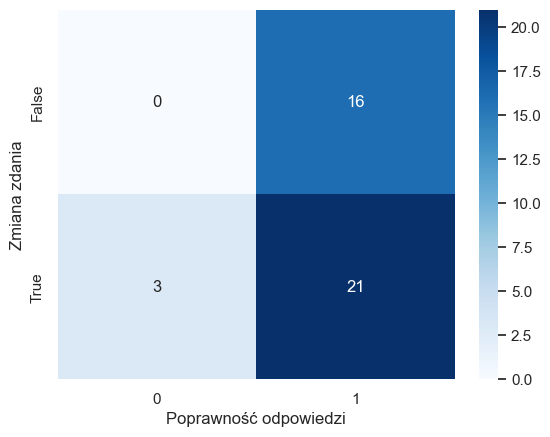

--------------------------------------------
2a:
----------------
quest1
quest1       False  True
correctness             
0                9     3
1               22     6
Fisher test conducted...
Fisher test statistic value: 0.8181818181818182
P-value: 1.0
Brak podstaw do odrzucenia H0.


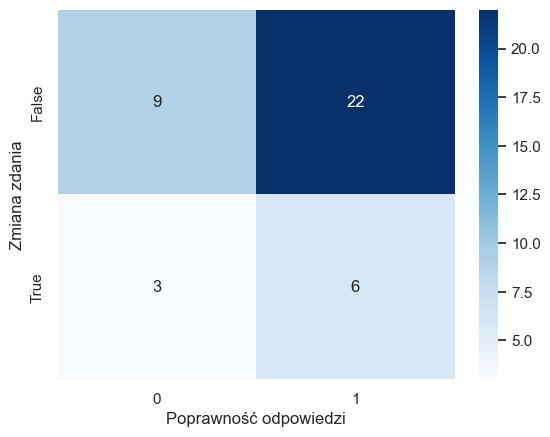

----------------
quest2
quest2       False  True
correctness             
0                3     9
1               13    15
Fisher test conducted...
Fisher test statistic value: 0.38461538461538464
P-value: 0.2968879040658141
Brak podstaw do odrzucenia H0.


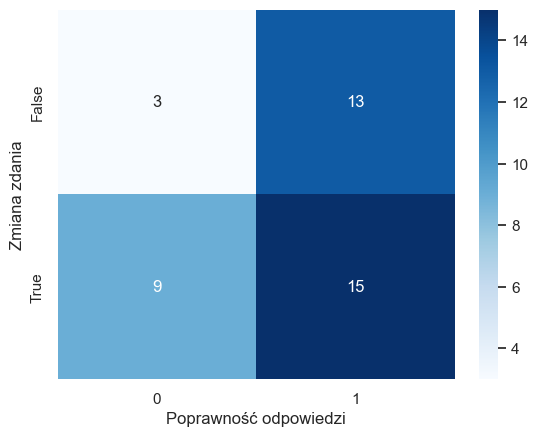

--------------------------------------------
2b:
----------------
quest1
quest1       False  True
correctness             
0                8     3
1               23     6
Fisher test conducted...
Fisher test statistic value: 0.6956521739130435
P-value: 0.6860618358296376
Brak podstaw do odrzucenia H0.


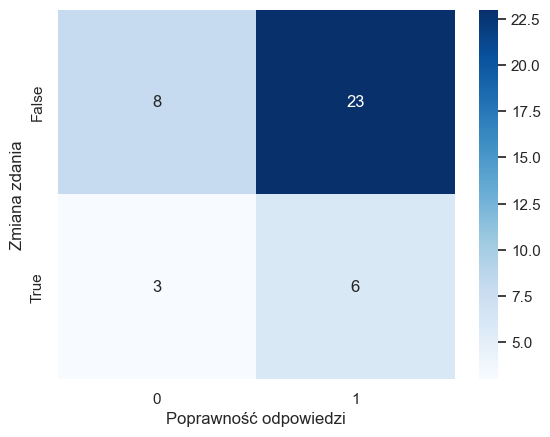

----------------
quest2
quest2       False  True
correctness             
0                2     9
1               14    15
Fisher test conducted...
Fisher test statistic value: 0.23809523809523808
P-value: 0.14782456403349242
Brak podstaw do odrzucenia H0.


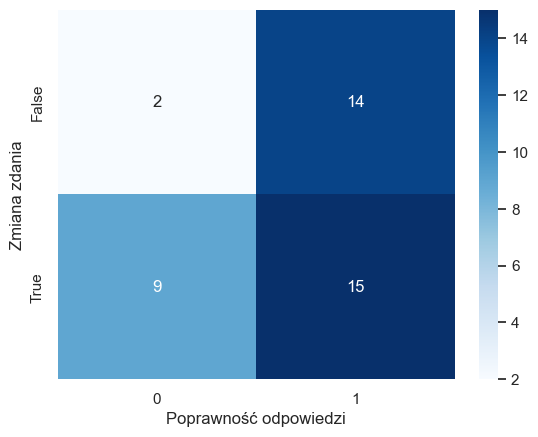

--------------------------------------------
3a:
----------------
quest1
quest1       False  True
correctness             
0               14     4
1               17     5
Fisher test conducted...
Fisher test statistic value: 1.0294117647058822
P-value: 1.0
Brak podstaw do odrzucenia H0.


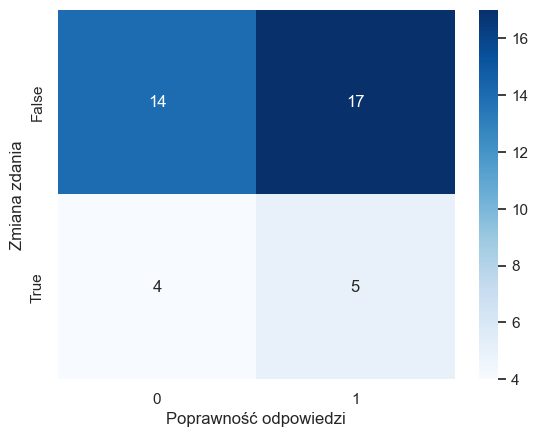

----------------
quest2
quest2       False  True
correctness             
0                8    10
1                8    14
Chi2 test conducted...
Chi-squared test statistic value: 0.26936026936026963
P-value: 0.6037612321081911
Brak podstaw do odrzucenia H0.


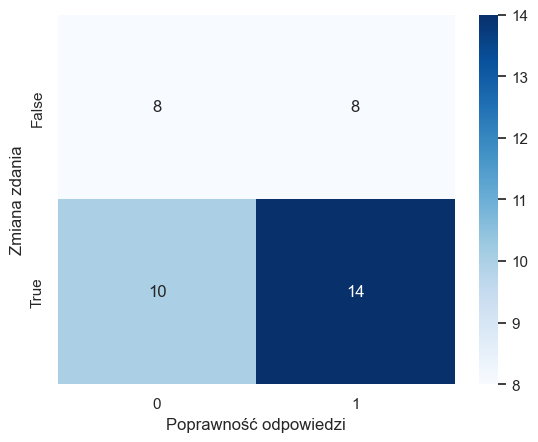

--------------------------------------------
3b:
----------------
quest1
quest1       False  True
correctness             
0               15     7
1               16     2
Fisher test conducted...
Fisher test statistic value: 0.26785714285714285
P-value: 0.1488784330889594
Brak podstaw do odrzucenia H0.


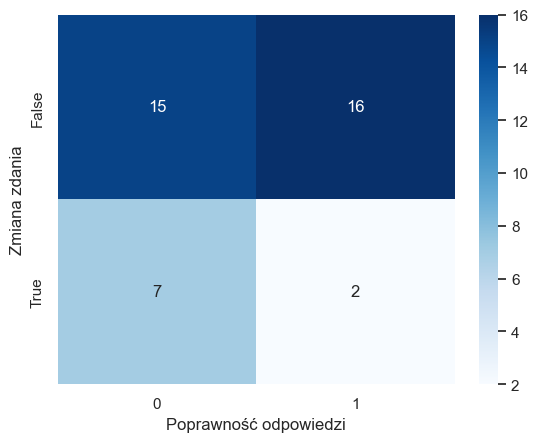

----------------
quest2
quest2       False  True
correctness             
0               10    12
1                6    12
Chi2 test conducted...
Chi-squared test statistic value: 0.6060606060606056
P-value: 0.4362749288405292
Brak podstaw do odrzucenia H0.


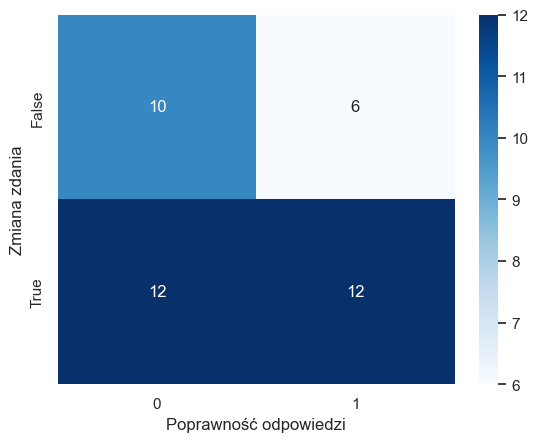

In [93]:
# dla każdej grafiki oddzielnie
col = 'correctness'
c = 'corr'
label_col = 'Poprawność odpowiedzi'
label_quest = 'Zmiana zdania'

print('1a:')
df = prepare_set_changes_questions([df_merge[f'1a_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    chi2_or_fisher_test(df, col, i, alpha=ALPHA)
    plot_heatmap(df, i, col, label_quest, label_col, cmap='Blues')
    
print('--------------------------------------------')
print('1b:')
df = prepare_set_changes_questions([df_merge[f'1b_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    chi2_or_fisher_test(df, col, i, alpha=ALPHA)
    plot_heatmap(df, i, col, label_quest, label_col, cmap='Blues')

print('--------------------------------------------')
print('2a:')
df = prepare_set_changes_questions([df_merge[f'2a_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    chi2_or_fisher_test(df, col, i, alpha=ALPHA)
    plot_heatmap(df, i, col, label_quest, label_col, cmap='Blues')

print('--------------------------------------------')
print('2b:')
df = prepare_set_changes_questions([df_merge[f'2b_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    chi2_or_fisher_test(df, col, i, alpha=ALPHA)
    plot_heatmap(df, i, col, label_quest, label_col, cmap='Blues')

print('--------------------------------------------')
print('3a:')
df = prepare_set_changes_questions([df_merge[f'3a_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    chi2_or_fisher_test(df, col, i, alpha=ALPHA)
    plot_heatmap(df, i, col, label_quest, label_col, cmap='Blues')

print('--------------------------------------------')
print('3b:')
df = prepare_set_changes_questions([df_merge[f'3b_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    chi2_or_fisher_test(df, col, i, alpha=ALPHA)
    plot_heatmap(df, i, col, label_quest, label_col, cmap='Blues')

Podsumowanie:
Zmiana zdania nie wpłynęła na poprawność odpowiedzi w sposób istotny statystycznie.

**H0:** Nie ma istotnej statystycznie zależności między oceną trudności zadania a zmianą zdania w pytaniu 1/2.

**H1:** Istnieje istotna statystycznie zależność między oceną trudności zadania a zmianą zdania w pytaniu 1/2.

**Poziom istotności:** $\alpha=0.05$

1a:
----------------
quest1
U-statistic: 193.5
p-value: 0.06905920114544387
Brak podstaw do odrzucenia H0.


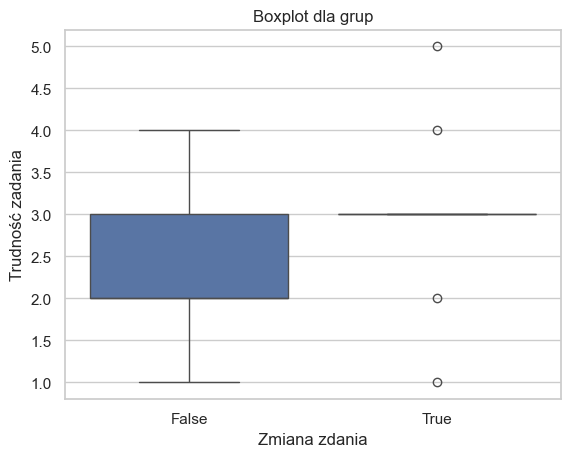

----------------
quest2
U-statistic: 219.0
p-value: 0.4427299017788052
Brak podstaw do odrzucenia H0.


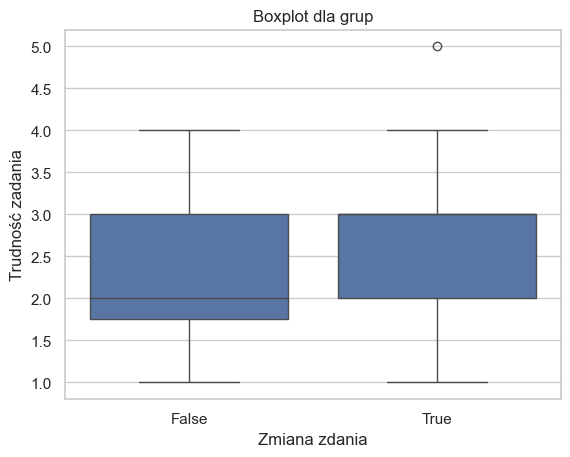

--------------------------------------------
1b:
----------------
quest1
U-statistic: 185.0
p-value: 0.11468248877800034
Brak podstaw do odrzucenia H0.


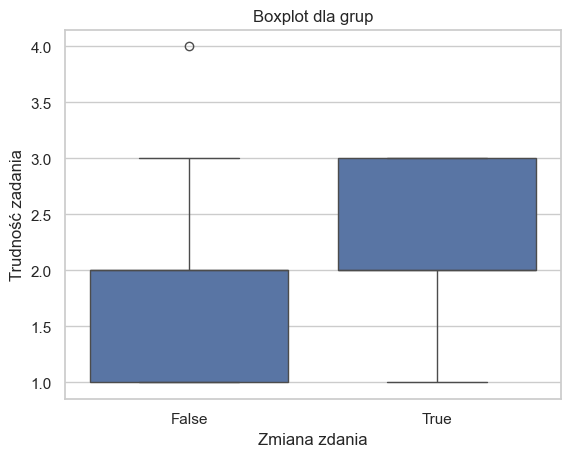

----------------
quest2
U-statistic: 147.0
p-value: 0.1836198284832813
Brak podstaw do odrzucenia H0.


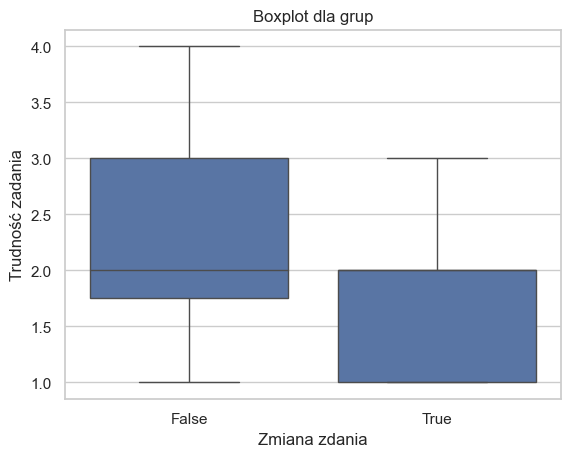

--------------------------------------------
2a:
----------------
quest1
U-statistic: 155.5
p-value: 0.6001148614261298
Brak podstaw do odrzucenia H0.


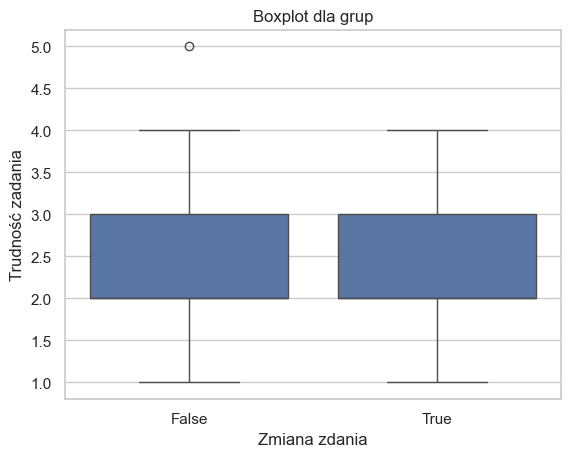

----------------
quest2
U-statistic: 152.5
p-value: 0.2608709738847239
Brak podstaw do odrzucenia H0.


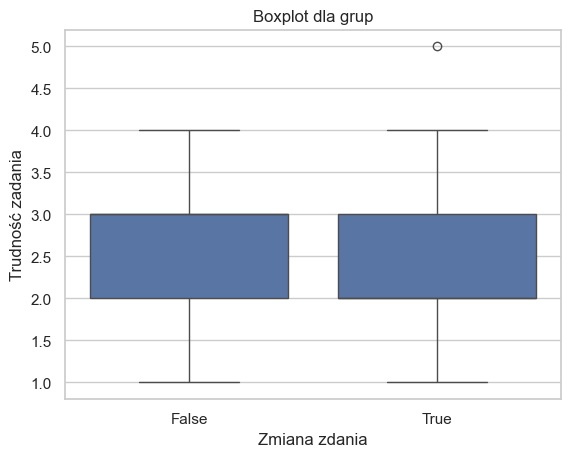

--------------------------------------------
2b:
----------------
quest1
U-statistic: 181.0
p-value: 0.16471419119319075
Brak podstaw do odrzucenia H0.


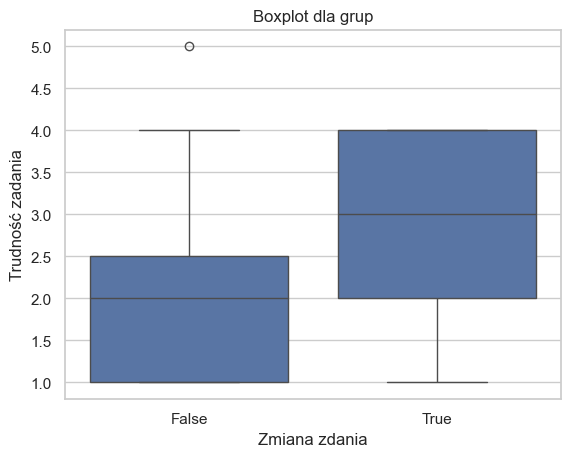

----------------
quest2
U-statistic: 189.5
p-value: 0.9539313656200814
Brak podstaw do odrzucenia H0.


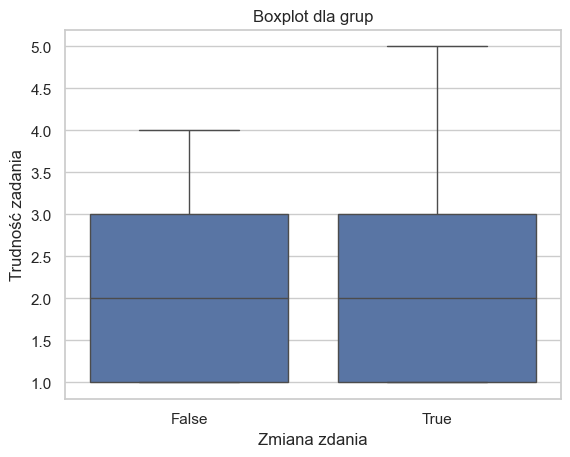

--------------------------------------------
3a:
----------------
quest1
U-statistic: 95.0
p-value: 0.1402899652297783
Brak podstaw do odrzucenia H0.


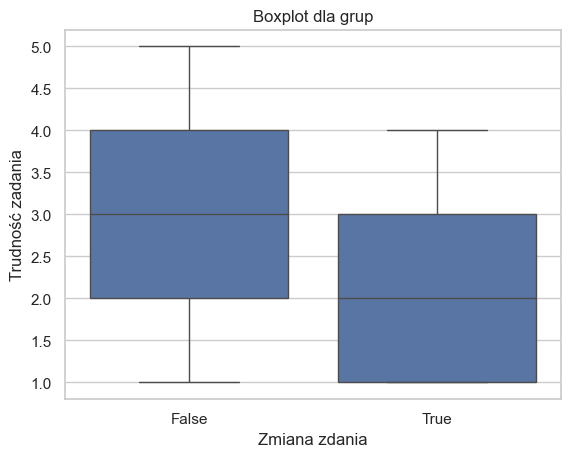

----------------
quest2
U-statistic: 212.0
p-value: 0.5774656755435009
Brak podstaw do odrzucenia H0.


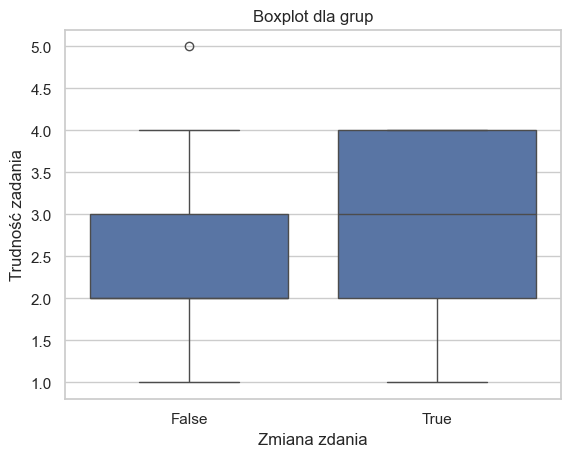

--------------------------------------------
3b:
----------------
quest1
U-statistic: 136.0
p-value: 0.9198245151530903
Brak podstaw do odrzucenia H0.


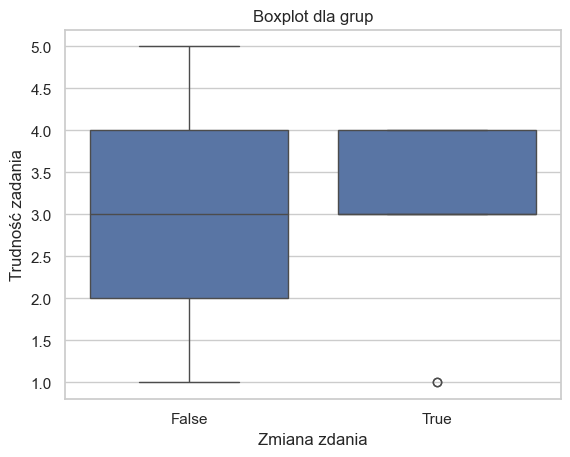

----------------
quest2
U-statistic: 172.0
p-value: 0.577063663805738
Brak podstaw do odrzucenia H0.


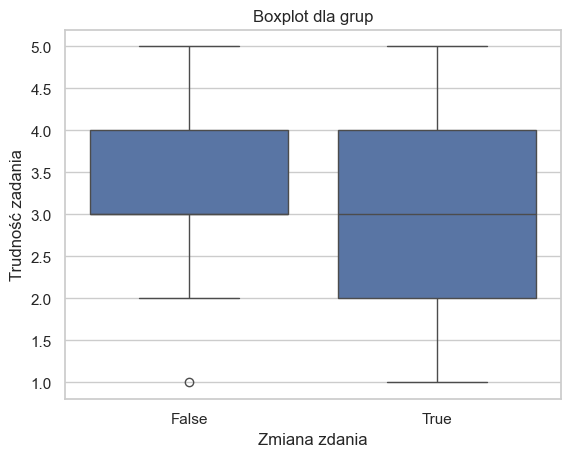

In [94]:
# dla każdej grafiki oddzielnie
col = 'difficulty'
c = 'trud'
label_col = 'Trudność zadania'
label_quest = 'Zmiana zdania'

print('1a:')
df = prepare_set_changes_questions([df_merge[f'1a_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    mann_whitney_test([df[col][df[i] == True], df[col][df[i] == False]], print_flag=True, alpha=ALPHA)
    plot_multi_boxplot(df, i, col, label_quest, label_col)
    
print('--------------------------------------------')
print('1b:')
df = prepare_set_changes_questions([df_merge[f'1b_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    mann_whitney_test([df[col][df[i] == True], df[col][df[i] == False]], print_flag=True, alpha=ALPHA)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

print('--------------------------------------------')
print('2a:')
df = prepare_set_changes_questions([df_merge[f'2a_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    mann_whitney_test([df[col][df[i] == True], df[col][df[i] == False]], print_flag=True, alpha=ALPHA)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

print('--------------------------------------------')
print('2b:')
df = prepare_set_changes_questions([df_merge[f'2b_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    mann_whitney_test([df[col][df[i] == True], df[col][df[i] == False]], print_flag=True, alpha=ALPHA)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

print('--------------------------------------------')
print('3a:')
df = prepare_set_changes_questions([df_merge[f'3a_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    mann_whitney_test([df[col][df[i] == True], df[col][df[i] == False]], print_flag=True, alpha=ALPHA)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

print('--------------------------------------------')
print('3b:')
df = prepare_set_changes_questions([df_merge[f'3b_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    mann_whitney_test([df[col][df[i] == True], df[col][df[i] == False]], print_flag=True, alpha=ALPHA)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

Podsumowanie:
Zmiana zdania nie wpłynęła na ocenę trudności zadania w sposób istotny statystycznie.

## Wizualizacje dla kolekcji

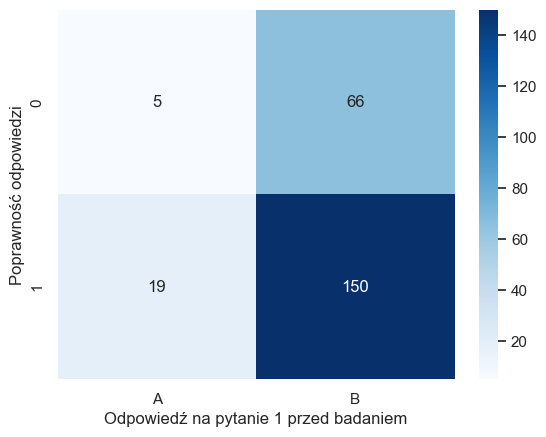

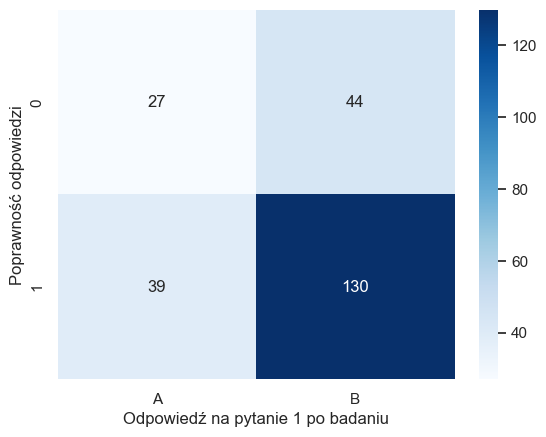

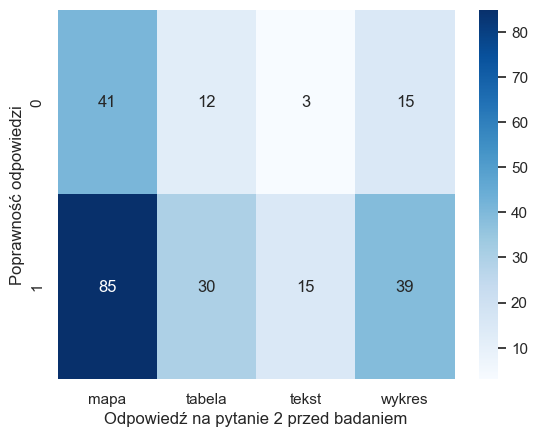

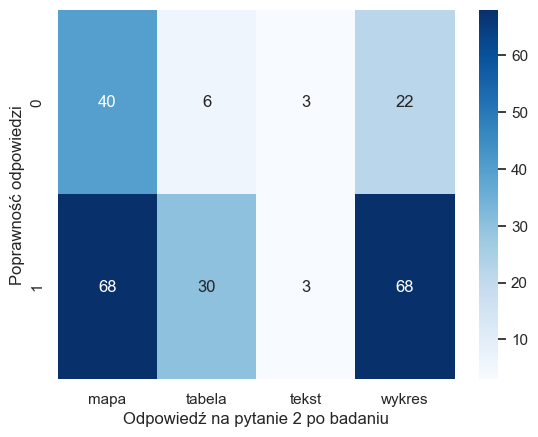

In [95]:
plot_heatmap(df_collAll, 'correctness', 'quest1_before', 'Poprawność odpowiedzi',
             'Odpowiedź na pytanie 1 przed badaniem', cmap='Blues')
plot_heatmap(df_collAll, 'correctness', 'quest1_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 po badaniu',
             cmap='Blues')
plot_heatmap(df_collAll, 'correctness', 'quest2_before', 'Poprawność odpowiedzi',
             'Odpowiedź na pytanie 2 przed badaniem', cmap='Blues')
plot_heatmap(df_collAll, 'correctness', 'quest2_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 po badaniu',
             cmap='Blues')

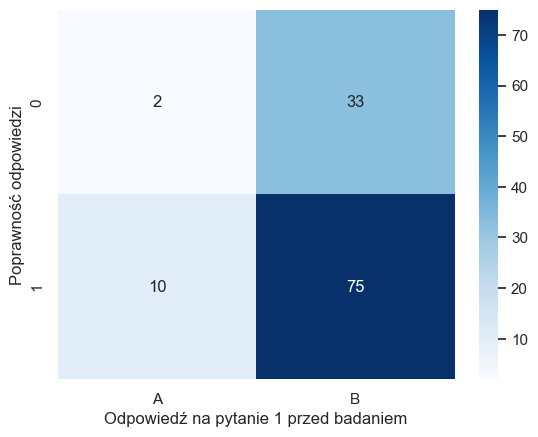

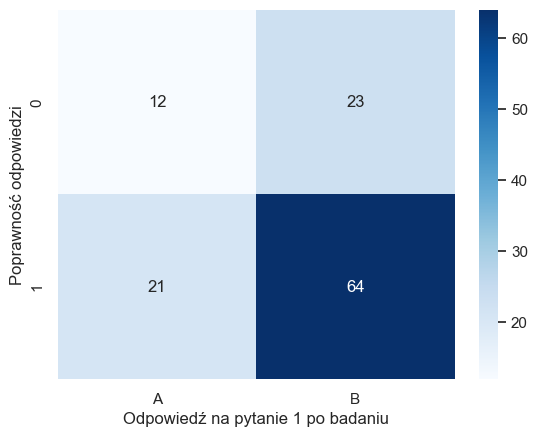

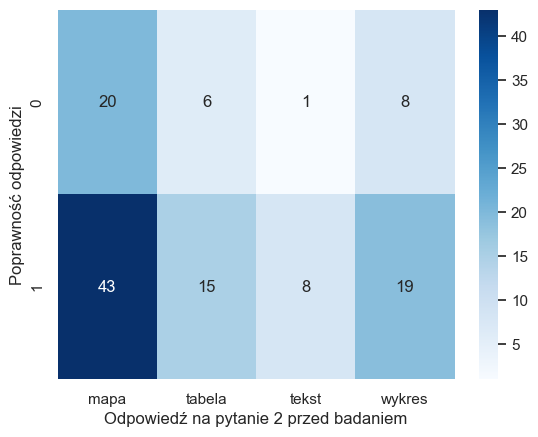

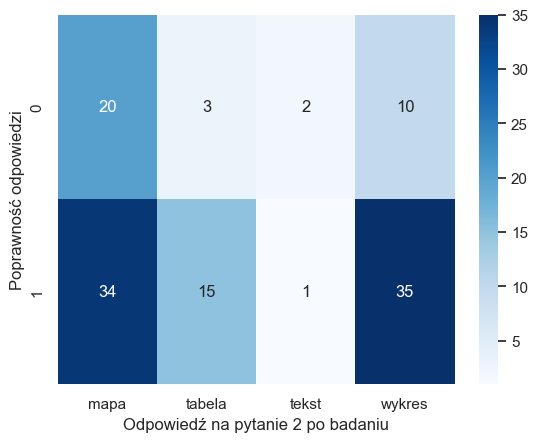

In [96]:
plot_heatmap(df_collA, 'correctness', 'quest1_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 przed badaniem',
             cmap='Blues')
plot_heatmap(df_collA, 'correctness', 'quest1_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 po badaniu',
             cmap='Blues')
plot_heatmap(df_collA, 'correctness', 'quest2_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 przed badaniem',
             cmap='Blues')
plot_heatmap(df_collA, 'correctness', 'quest2_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 po badaniu',
             cmap='Blues')

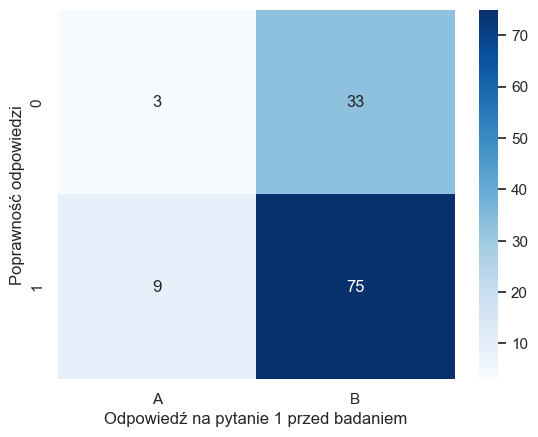

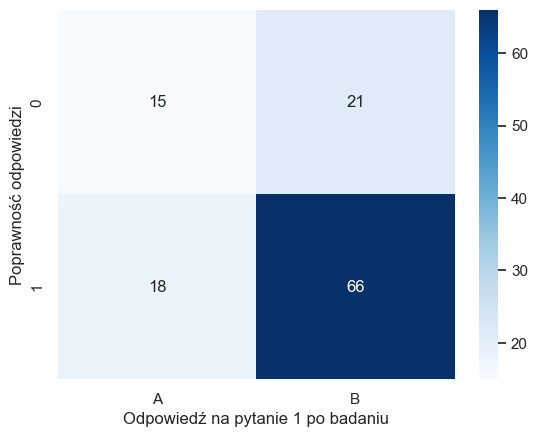

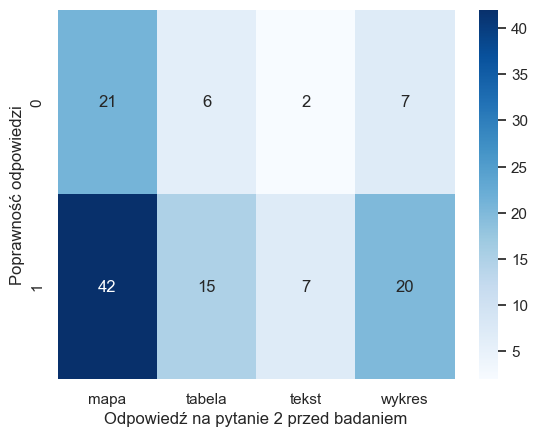

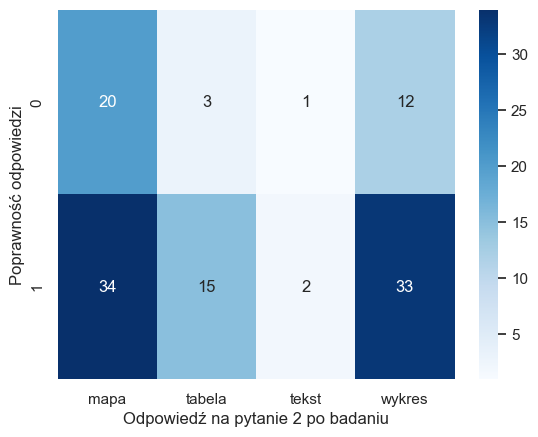

In [97]:
plot_heatmap(df_collB, 'correctness', 'quest1_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 przed badaniem',
             cmap='Blues')
plot_heatmap(df_collB, 'correctness', 'quest1_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 po badaniu',
             cmap='Blues')
plot_heatmap(df_collB, 'correctness', 'quest2_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 przed badaniem',
             cmap='Blues')
plot_heatmap(df_collB, 'correctness', 'quest2_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 po badaniu',
             cmap='Blues')

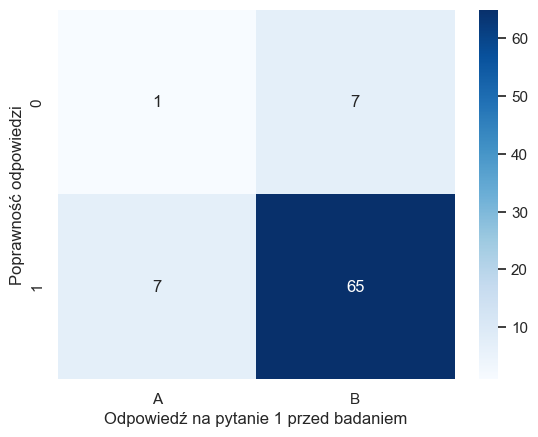

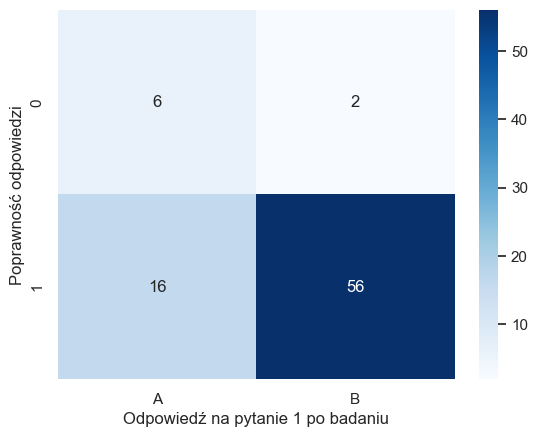

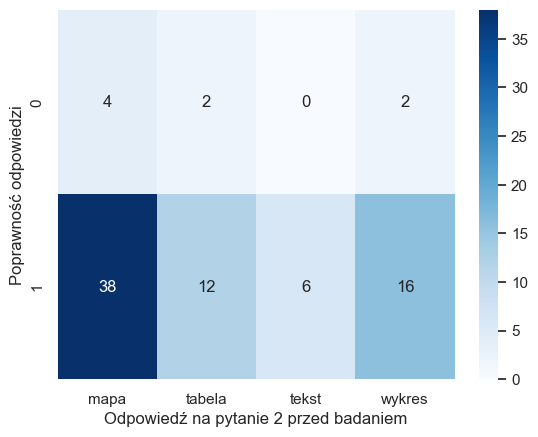

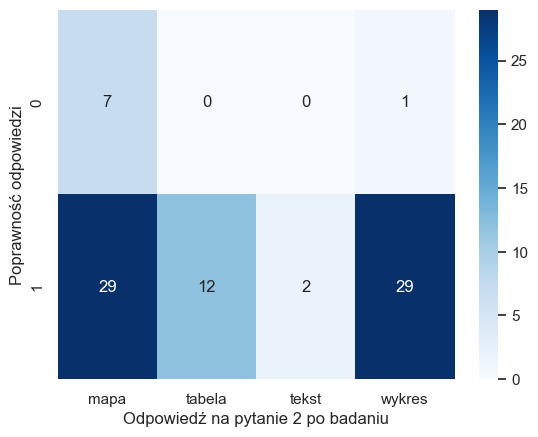

In [98]:
plot_heatmap(df_coll1, 'correctness', 'quest1_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 przed badaniem',
             cmap='Blues')
plot_heatmap(df_coll1, 'correctness', 'quest1_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 po badaniu',
             cmap='Blues')
plot_heatmap(df_coll1, 'correctness', 'quest2_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 przed badaniem',
             cmap='Blues')
plot_heatmap(df_coll1, 'correctness', 'quest2_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 po badaniu',
             cmap='Blues')

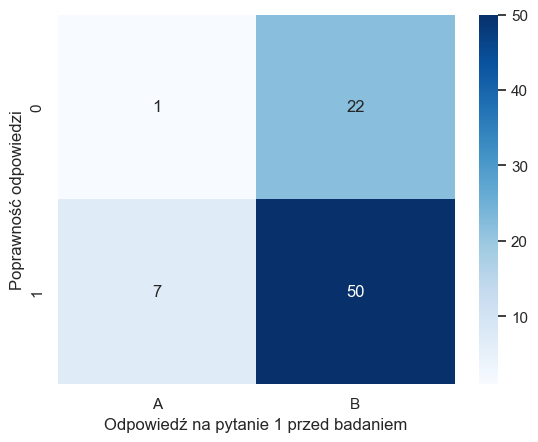

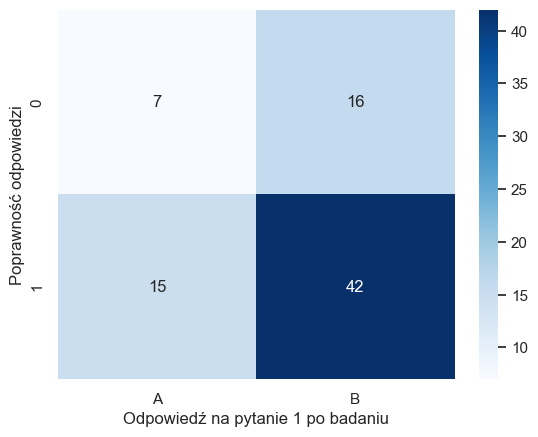

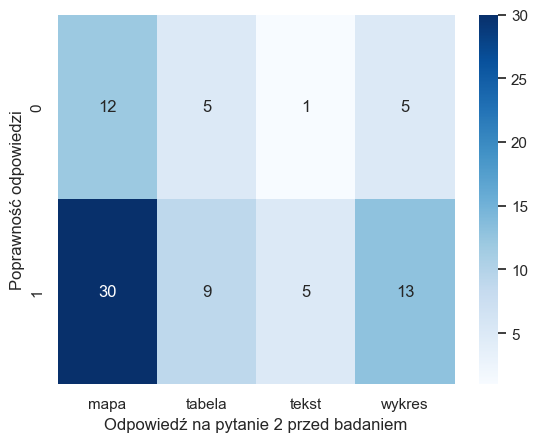

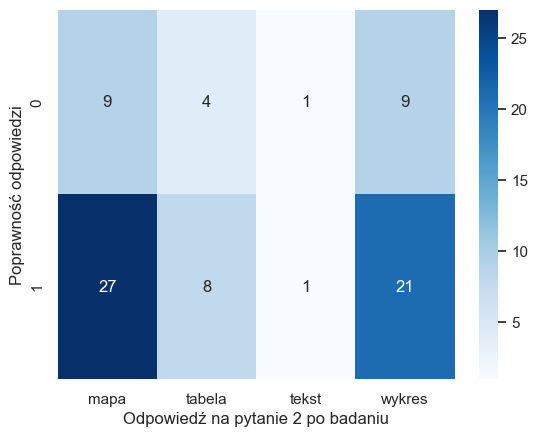

In [99]:
plot_heatmap(df_coll2, 'correctness', 'quest1_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 przed badaniem',
             cmap='Blues')
plot_heatmap(df_coll2, 'correctness', 'quest1_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 po badaniu',
             cmap='Blues')
plot_heatmap(df_coll2, 'correctness', 'quest2_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 przed badaniem',
             cmap='Blues')
plot_heatmap(df_coll2, 'correctness', 'quest2_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 po badaniu',
             cmap='Blues')

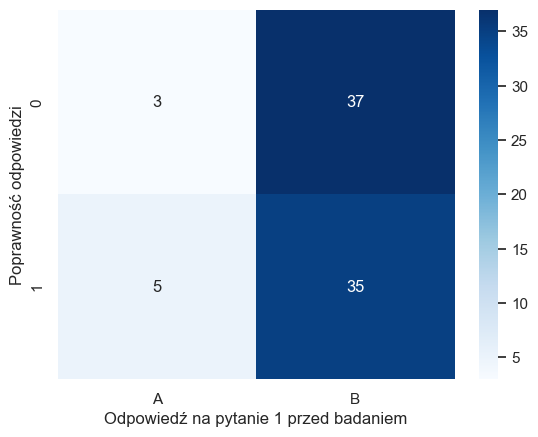

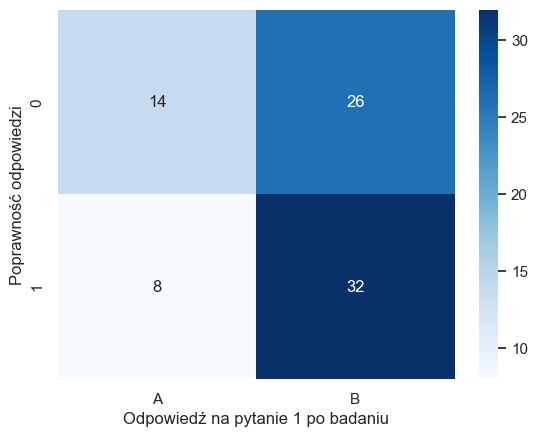

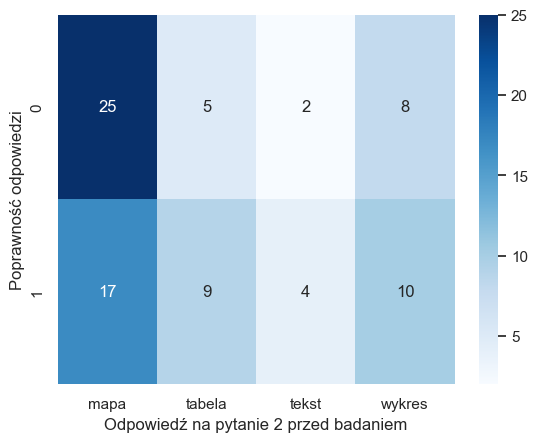

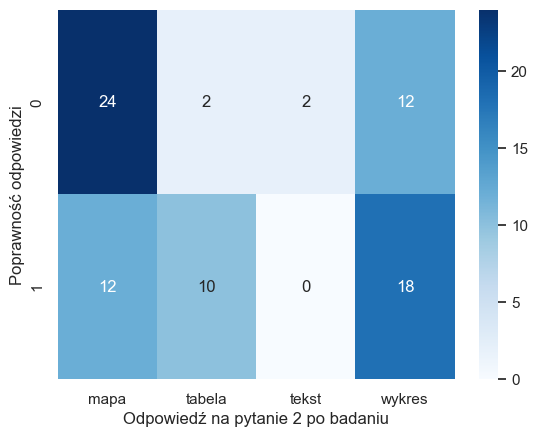

In [100]:
plot_heatmap(df_coll3, 'correctness', 'quest1_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 przed badaniem',
             cmap='Blues')
plot_heatmap(df_coll3, 'correctness', 'quest1_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 po badaniu',
             cmap='Blues')
plot_heatmap(df_coll3, 'correctness', 'quest2_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 przed badaniem',
             cmap='Blues')
plot_heatmap(df_coll3, 'correctness', 'quest2_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 po badaniu',
             cmap='Blues')